# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat5"
layers = [11]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 4.7893853187561035
Epoch 1, Loss 4.796117782592773
Epoch 2, Loss 4.7946083545684814
Epoch 3, Loss 4.804102659225464
Epoch 4, Loss 4.884623050689697
Epoch 5, Loss 4.783524036407471
Epoch 6, Loss 4.910454750061035
Epoch 7, Loss 4.914718389511108
Epoch 8, Loss 4.772706508636475
Epoch 9, Loss 4.759736776351929
Epoch 10, Loss 4.736853361129761
Epoch 11, Loss 4.765637636184692
Epoch 12, Loss 4.7638936042785645
Epoch 13, Loss 4.899780988693237
Epoch 14, Loss 4.763626337051392
Epoch 15, Loss 4.761987686157227
Epoch 16, Loss 4.743165016174316
Epoch 17, Loss 4.889962911605835
Epoch 18, Loss 4.737914562225342
Epoch 19, Loss 4.815255403518677
Epoch 20, Loss 4.821083068847656
Epoch 21, Loss 4.716703653335571
Epoch 22, Loss 4.7088072299957275
Epoch 23, Loss 4.718326091766357
Epoch 24, Loss 4.730475187301636
Epoch 25, Loss 4.68310809135437
Epoch 26, Loss 4.674713373184204
Epoch 27, Loss 4.693544864654541
Epoch 28, Loss 4.810485363006592
Epoch 29, Loss 4.6812193393707275
Epoch 30, Loss 4

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

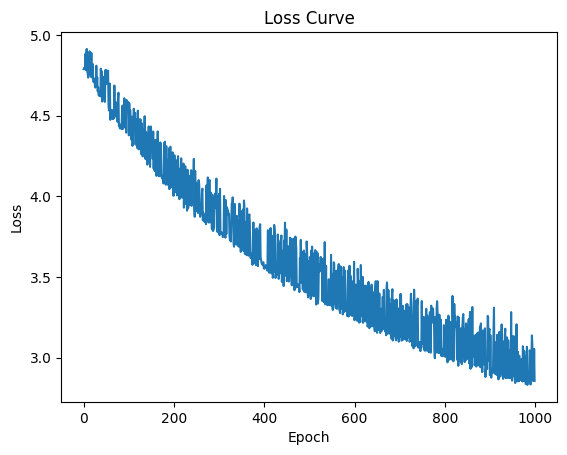

In [5]:
# # Print the loss curve
# Visualize the loss curve to ensure that the model is learning correctly. 
# Save the loss curve in `figures/` so that you can refer to them later.

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.savefig(f"figures/{label_name}_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

No examples for class 0
No examples for class 1
Accuracy for class 2 = 0.0%
Accuracy for class 3 = 0.0%
Accuracy for class 4 = 33.333333333333336%
Accuracy for class 5 = 20.0%
Accuracy for class 6 = 0.0%
Accuracy for class 7 = 16.666666666666668%
Accuracy for class 8 = 0.0%
Accuracy for class 9 = 0.0%
No examples for class 10
Overall accuracy = 12.5%
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Accuracy for class 2 = 62.5%
Accuracy for class 3 = 46.15384615384615%
Accuracy for class 4 = 35.294117647058826%
Accuracy for class 5 = 17.647058823529413%
Accuracy for class 6 = 50.0%
Accuracy for class 7 = 22.22222222222222%
Accuracy for class 8 = 87.5%
Accuracy for class 9 = 100.0%
Accuracy for class 10 = 100.0%
Overall accuracy = 46.875%


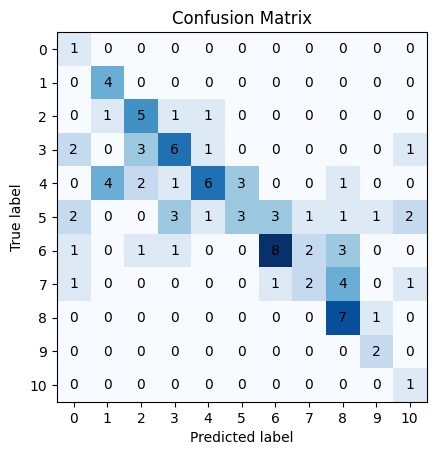

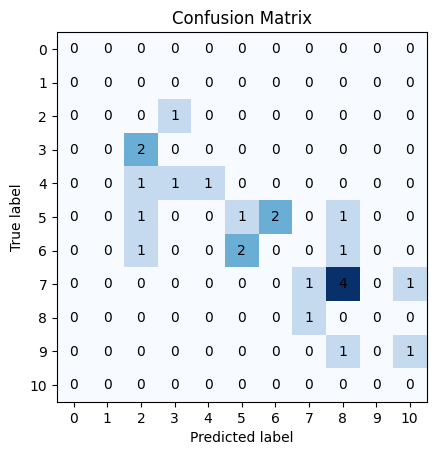

In [6]:
# Evaluate the model
# Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.
# No need to save plots or confusion matrix in this step.
# Code below:
conf_matrix_train = evaluate_model(model, training_dataset)
conf_matrix_test = evaluate_model(model, test_dataset)
conf_matrix_test.print_accuracy()
conf_matrix_train.print_accuracy()
conf_matrix_train.plot()
conf_matrix_test.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

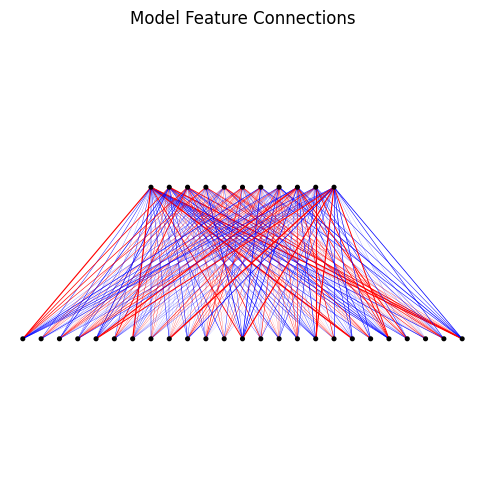

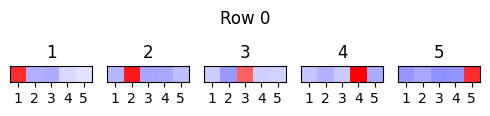

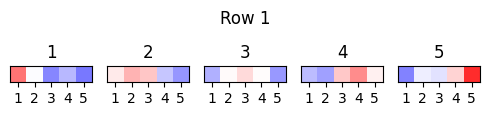

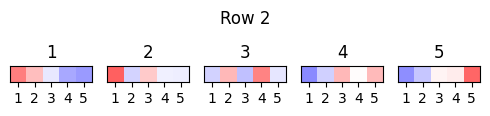

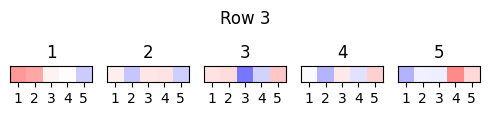

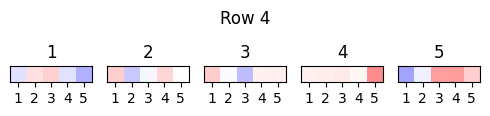

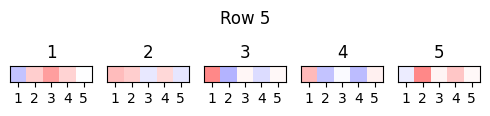

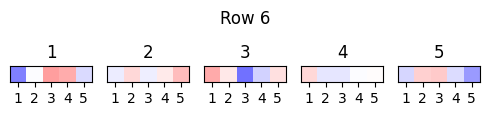

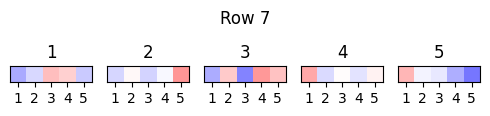

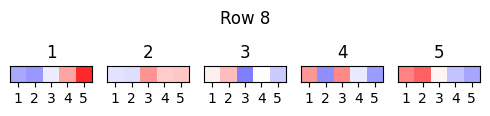

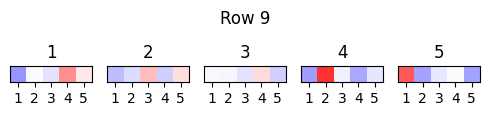

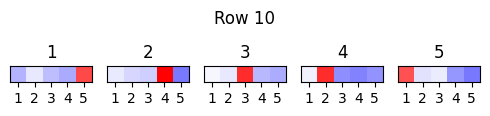

In [7]:
# Plot the model weights and connections in order to attempt to interpret what the model is learning.
# No need to save the plot in this step.
# Code below:
model.plot_connections()
# Plot heatmap of all model weights for all layers and index
# loop through all layers and plot the heatmap of the weights for each layer
# No need to save the plot in this step.
# Code below:
for i in range(len(layers)):
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)